# STATS 231A Homework 1 - Candace McKeag

Original code credit goes to @iamtrask and @SkalskiP:
* https://iamtrask.github.io/2015/07/12/basic-python-network/
* https://github.com/SkalskiP/ILearnDeepLearning.py/blob/master/01_mysteries_of_neural_networks/03_numpy_neural_net/Numpy%20deep%20neural%20network.ipynb

# Env Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# for problem 2
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Problem 1

*Read the blog and play with the code with one hidden layer: https://iamtrask.github.io/2015/07/12/basic-python-network/.*

## TwoLayerNet Class

In [2]:
class TwoLayerNet(object):
    """
    A class to build a two layer neural network (one input layer, one hidden layer).
    ...

    Attributes
    ----------
    X : np.ndarray
        input dataset matrix where each row is a training example
    y : np.ndarray
        Output dataset matrix where each row is a training example
    activation_function : str
        activation_function function to use for hidden layer; takes 'sigmoid' or 'relu'
    learning_rate : float
        learning rate of weights to use for gradient descent

    Methods
    -------
    hidden_layer(activation_function, x, derivative=False):
        Provides either the sigmoid function or ReLU function to use in hidden layer.
    train():
        Performs forward propagation and gradient descent to learn weights and build the net.
    """

    def __init__(self, X, y, activation_function="sigmoid", learning_rate=1.0):
        """
        Constructs all the necessary attributes for the TwoLayerNet object.

        Parameters
        ----------
            X : np.ndarray
                input dataset matrix where each row is a training example
            y : np.ndarray
                Output dataset matrix where each row is a training example
            activation_function : str
                activation_function function to use for hidden layer, default sigmoid
            learning_rate : float
                learning rate of weights to use for gradient descent, default 1
        """
        self.X = X
        self.y = y
        self.activation_function = activation_function
        self.learning_rate = learning_rate

    @staticmethod
    def hidden_layer(activation_function, x, derivative=False):
        """
        Provides either the sigmoid function or ReLU function to use in hidden layer.

        Parameters
        ----------
        activation_function : str
            specifies function
        x : np.ndarray
            inner product vector to apply function on
        derivative : bool
            whether to use derivative of function, default False

        Returns
        -------
        function output, dependent on parameters
        """
        if activation_function == "sigmoid":
            if derivative:
                return x * (1 - x)
            else:
                return 1 / (1 + np.exp(-x))
        elif activation_function == "relu":
            if derivative:
                return np.where(x > 0, 1, 0)
            else:
                return np.where(x > 0, x, 0)

    def train(self):
        """
        Performs backpropagation and gradient descent to learn weights and build the network

        Returns
        -------
        mae : float
            mean absolute error of final predictions
        """
        # seed random numbers to make calculation deterministic
        np.random.seed(1)
        # initialize weights randomly with mean 0
        p = self.X.shape[1]
        beta = 2 * np.random.random((p, 1)) - 1
        #beta = np.repeat(0.0,p).reshape(p,1)

        for i in range(10000):
            # forward propagation
            layer_1 = self.X
            layer_2 = self.hidden_layer(activation_function=self.activation_function,
                                        x=np.dot(layer_1, beta),
                                        derivative=False)

            # how much did we miss?
            layer_2_error = self.y - layer_2

            # multiply how much we missed by the
            # slope of the activation function at the values in layer_2
            layer_2_delta = layer_2_error * self.hidden_layer(activation_function=self.activation_function,
                                                              x=layer_2,
                                                              derivative=True)

            # update weights
            beta += self.learning_rate * np.dot(layer_1.T, layer_2_delta)

        mae = np.mean(np.abs(layer_2_error))
        print("Error:" + str(mae))
        return mae

## Implementation

In [3]:
# input variables
X_1 = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
# output variable
y_1 = np.array([[0,0,1,1]]).T

In [4]:
net_1 = TwoLayerNet(X_1, y_1, activation_function="sigmoid", learning_rate=1)
_ = net_1.train()

Error:0.007955249410716037


## (1) Change the training set

*Change the training dataset so that it has more training examples and more input variables.*

The following example consists of 1,000 training examples and 20 input variables. The input data is simulated from a standard normal distribution. We use the input data, defined beta coefficients, and random noise to generate the raw y values. These raw values are then transformed with indicator function 
    $$I(y > 0) = \begin{cases} 
          1, & y > 0 \\
          0, & y \leq 0
       \end{cases}$$
to obtain a binary response vector.

In [5]:
# standard normal input matrix, 1000 x 20
X_1_1 = np.random.normal(0, 1, (1000, 20))
# beta coefficients
beta = np.arange(1,21)
    
# dot product of X and Betas + random noise
raw = (np.dot(X_1_1, beta) + np.random.normal(0, 1, 1000))
# application of indicator function
y_1_1 = np.where(raw <= 0, 0, 1).reshape(1000,1)

In [6]:
net_1_1 = TwoLayerNet(X_1_1, y_1_1, activation_function="sigmoid", learning_rate=1)
_ = net_1_1.train()

Error:0.0019675487778409565


## (2) Change the hidden layer

*Change the non-linearity of the hidden layer to ReLU.*

Using the `activation_function` attribute of the implementation of the given code into the class object above, the nonlinear function of the hidden layer can easily be changed from the sigmoid function to ReLU. Also, the larger dataset from the previous section is used. We use a smaller learning rate of $10^{-4}$ to help the weights converge.

In [7]:
net_1_2 = TwoLayerNet(X_1_1, y_1_1, activation_function="relu", learning_rate=10e-4)
_ = net_1_2.train()

Error:0.26377691804982756


## (3) Change the learning rate

*Change the learning rate of gradient descent.*

Let's explore different learning rates and how they affect the mean absolute error of the predictions. We use a logarithmic range of learning rates from $10^{-7}$ to 1, totaling eight different networks. We see that the network with a learning rate of $10^{-7}$ has the highest mean absolute error, and the network with the lowest mean absolute error is actually that with a learning rate of 1. The networks in between have steadlily decreasing MAEs.

In [8]:
learning_rates = [10**-exp for exp in range(7,-1,-1)]

errors = []
for lr in learning_rates:
    net_1_3 = TwoLayerNet(X_1_1, y_1_1, activation_function="sigmoid", learning_rate=lr)
    error = net_1_3.train()
    errors.append(error)

Error:0.5827887607205507
Error:0.5184928687783615
Error:0.19389817420163064
Error:0.08688656546968225
Error:0.03926773783586701
Error:0.017437117246612798
Error:0.007010355366255774
Error:0.0019675487778409565


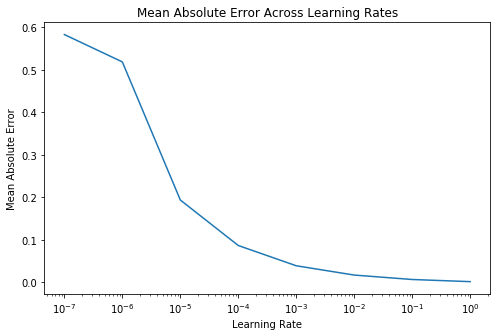

In [9]:
plt.figure(figsize=(8,5))
plt.plot(learning_rates, errors)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Across Learning Rates')
plt.show()

## Brief memo

*Write a brief memo on your work so that after one year, you can still recall what this assignment is about. Describe the underlying theory, method, code, and what you have done and discovered.*

This first problem was a really good introduction to a very simple neural network. It helped me to understand the very core ideas behind neural networks, such as forward propagation and backpropagation. Even though the nets built with this code are small and simple, they are still able to achieve very low error rates with their predictions. The best net from this problem was that built on a larger dataset with a learning rate of 1 and using the sigmoid activation function.

# Problem 2

*Read the blog and play with the code: https://github.com/SkalskiP/ILearnDeepLearning.py/blob/master/01_mysteries_of_neural_networks/03_numpy_neural_net/Numpy%20deep%20neural%20network.ipynb.*

## MultiLayerNet Class

In [10]:
class MultiLayerNet(object):
    """
    A class to build a multilayer neural network.
    ...

    Attributes
    ----------
    nn_architecture : list
        describes the architecture of the desired network. list of dictionaries, each of the format
        {'input_dim': n, 'output_dim': m, 'activation': "sigmoid" or "relu"}.
    seed : int
        initialize random seed for deterministic output, default is 99.

    Methods
    -------
    sigmoid(Z):
        Provides the sigmoid function to use in hidden layer.
    relu(Z):
        Provides the ReLU function to use in hidden layer.
    sigmoid_backward(dA, Z):
        Provides the gradient of the sigmoid function.
    relu_backward(dA, Z):
        Provides the gradient of the ReLU function.
    get_cost_value(Y_hat, Y):
        Computes cost of predictions for true y-values.
    convert_prob_into_class(probs):
        Converts values in probs > 0.5 to 1, <= 0.5 to 0.
    init_layers():
        Uses nn_architecture attribute to initialize network layers and weights, and store parameters.
    single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
        Performs forward propagation for one layer.
    full_forward_propagation(X, params_values):
        Performs the full forward propagation step, returning predictions.
    single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
        Performs backward propagation for one layer.
    full_backward_propagation(Y_hat, Y, memory, params_values):
        Performs the full backward propagation step, returning gradient values.
    get_accuracy_value(Y_hat, Y):
        Uses convert_prob_into_class to compute accuracy of predictions for true y-values.
    update(params_values, grads_values, learning_rate):
        Updates the weights of the hidden layers.
    train(X, Y, epochs, learning_rate, verbose=False, callback=None):
        Culminates entire network building; initializes neural net parameters, iterates by performing
        step forward, calculating metrics, performing step backward, and updating model state.
    """
    def __init__(self, nn_architecture, seed=99):
        """
        Constructs all the necessary attributes for the TwoLayerNet object.

        Parameters
        ----------
        nn_architecture : list
            describes the architecture of the desired network. list of dictionaries, each of the format
            {'input_dim': n, 'output_dim': m, 'activation': "sigmoid" or "relu"}.
        seed : int
            initialize random seed for deterministic output, default is 99.
        """
        self.nn_architecture = nn_architecture
        self.seed = seed

    def __call__(self, X, y, test_size, learning_rate=0.01, verbose=True):
        # train test split on data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Training
        params_values = self.train(np.transpose(X_train),
                                   np.transpose(y_train.reshape((y_train.shape[0], 1))),
                                   epochs=10000,
                                   learning_rate=learning_rate,
                                   verbose=verbose)

        # Prediction
        Y_test_hat, _ = self.full_forward_propagation(np.transpose(X_test), params_values)

        # Accuracy achieved on the test set
        acc_test = self.get_accuracy_value(Y_test_hat, np.transpose(y_test.reshape((y_test.shape[0], 1))))

        print("Test set accuracy: {:.2f}".format(acc_test))
        return(acc_test)

    @staticmethod
    def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))

    @staticmethod
    def relu(Z):
        return np.maximum(0, Z)

    @staticmethod
    def sigmoid_backward(dA, Z):
        sig = 1 / (1 + np.exp(-Z))
        return dA * sig * (1 - sig)

    @staticmethod
    def relu_backward(dA, Z):
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        return dZ

    @staticmethod
    def get_cost_value(Y_hat, Y):
        # number of examples
        m = Y_hat.shape[1]
        # calculation of the cost according to the formula
        cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
        return np.squeeze(cost)

    # an auxiliary function that converts probability into class
    @staticmethod
    def convert_prob_into_class(probs):
        probs_ = np.copy(probs)
        probs_[probs_ > 0.5] = 1
        probs_[probs_ <= 0.5] = 0
        return probs_

    def init_layers(self):
        # random seed initiation
        np.random.seed(self.seed)
        # parameters storage initiation
        params_values = {}

        # iteration over network layers
        for idx, layer in enumerate(self.nn_architecture):
            # we number network layers from 1
            layer_idx = idx + 1

            # extracting the number of units in layers
            layer_input_size = layer["input_dim"]
            layer_output_size = layer["output_dim"]

            # initiating the values of the W matrix
            # and vector b for subsequent layers
            params_values['W' + str(layer_idx)] = np.random.randn(
                layer_output_size, layer_input_size) * 0.1
            params_values['b' + str(layer_idx)] = np.random.randn(
                layer_output_size, 1) * 0.1

        return params_values

    def single_layer_forward_propagation(self, A_prev, W_curr, b_curr, activation="relu"):
        # calculation of the input value for the activation function
        Z_curr = np.dot(W_curr, A_prev) + b_curr

        # selection of activation function
        if activation is "relu":
            activation_func = self.relu
        elif activation is "sigmoid":
            activation_func = self.sigmoid
        else:
            raise Exception('Non-supported activation function')

        # return of calculated activation A and the intermediate Z matrix
        return activation_func(Z_curr), Z_curr

    def full_forward_propagation(self, X, params_values):
        # creating a temporary memory to store the information needed for a backward step
        memory = {}
        # X vector is the activation for layer 0 
        A_curr = X

        # iteration over network layers
        for idx, layer in enumerate(self.nn_architecture):
            # we number network layers from 1
            layer_idx = idx + 1
            # transfer the activation from the previous iteration
            A_prev = A_curr

            # extraction of the activation function for the current layer
            activ_function_curr = layer["activation"]
            # extraction of W for the current layer
            W_curr = params_values["W" + str(layer_idx)]
            # extraction of b for the current layer
            b_curr = params_values["b" + str(layer_idx)]
            # calculation of activation for the current layer
            A_curr, Z_curr = self.single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)

            # saving calculated values in the memory
            memory["A" + str(idx)] = A_prev
            memory["Z" + str(layer_idx)] = Z_curr

        # return of prediction vector and a dictionary containing intermediate values
        return A_curr, memory

    def single_layer_backward_propagation(self, dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
        # number of examples
        m = A_prev.shape[1]

        # selection of activation function
        if activation is "relu":
            backward_activation_func = self.relu_backward
        elif activation is "sigmoid":
            backward_activation_func = self.sigmoid_backward
        else:
            raise Exception('Non-supported activation function')

        # calculation of the activation function derivative
        dZ_curr = backward_activation_func(dA_curr, Z_curr)

        # derivative of the matrix W
        dW_curr = np.dot(dZ_curr, A_prev.T) / m
        # derivative of the vector b
        db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
        # derivative of the matrix A_prev
        dA_prev = np.dot(W_curr.T, dZ_curr)

        return dA_prev, dW_curr, db_curr

    def full_backward_propagation(self, Y_hat, Y, memory, params_values):
        grads_values = {}

        # a hack ensuring the same shape of the prediction vector and labels vector
        Y = Y.reshape(Y_hat.shape)

        # initiation of gradient descent algorithm
        dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat))

        for layer_idx_prev, layer in reversed(list(enumerate(self.nn_architecture))):
            # we number network layers from 1
            layer_idx_curr = layer_idx_prev + 1
            # extraction of the activation function for the current layer
            activ_function_curr = layer["activation"]

            dA_curr = dA_prev

            A_prev = memory["A" + str(layer_idx_prev)]
            Z_curr = memory["Z" + str(layer_idx_curr)]

            W_curr = params_values["W" + str(layer_idx_curr)]
            b_curr = params_values["b" + str(layer_idx_curr)]

            dA_prev, dW_curr, db_curr = self.single_layer_backward_propagation(
                dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)

            grads_values["dW" + str(layer_idx_curr)] = dW_curr
            grads_values["db" + str(layer_idx_curr)] = db_curr

        return grads_values

    def get_accuracy_value(self, Y_hat, Y):
        Y_hat_ = self.convert_prob_into_class(Y_hat)
        return (Y_hat_ == Y).all(axis=0).mean()

    def update(self, params_values, grads_values, learning_rate):
        # iteration over network layers
        for layer_idx, layer in enumerate(self.nn_architecture, 1):
            params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]
            params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]
        return params_values

    def train(self, X, Y, epochs, learning_rate, verbose=False, callback=None):
        # initiation of neural net parameters
        params_values = self.init_layers()
        # initiation of lists storing the history
        # of metrics calculated during the learning process
        cost_history = []
        accuracy_history = []

        # performing calculations for subsequent iterations
        for i in range(epochs):
            # step forward
            Y_hat, cache = self.full_forward_propagation(X, params_values)

            # calculating metrics and saving them in history
            cost = self.get_cost_value(Y_hat, Y)
            cost_history.append(cost)
            accuracy = self.get_accuracy_value(Y_hat, Y)
            accuracy_history.append(accuracy)

            # step backward - calculating gradient
            grads_values = self.full_backward_propagation(Y_hat, Y, cache, params_values)
            # updating model state
            params_values = self.update(params_values, grads_values, learning_rate)

            if i % (epochs//10) == 0:
                if verbose:
                    print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
                if callback is not None:
                    callback(i, params_values)

        return params_values

## Implementation

The original code implements a neural network with 5 hidden layers. The maximum number of nodes in a layer is 50, and 4 out of these 5 layers use the ReLU activation function. 

This net achieves a test set accuracy of 97% and is able to minimize the cost to 0.077.

In [11]:
# layer architecture
architecture = [
    {"input_dim": 2, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"}
]

# number of samples in the data set
n_samples = 1000
# ratio between training and test sets
test_size = 0.1

X_2, y_2 = make_moons(n_samples=n_samples, noise=0.2, random_state=100)

In [12]:
net_2 = MultiLayerNet(architecture)
_ = net_2(X_2, y_2, test_size)

Iteration: 00000 - cost: 0.69398 - accuracy: 0.50444
Iteration: 01000 - cost: 0.68732 - accuracy: 0.64333
Iteration: 02000 - cost: 0.58974 - accuracy: 0.82111
Iteration: 03000 - cost: 0.27629 - accuracy: 0.87889
Iteration: 04000 - cost: 0.24330 - accuracy: 0.88889
Iteration: 05000 - cost: 0.17292 - accuracy: 0.93333
Iteration: 06000 - cost: 0.10345 - accuracy: 0.96333
Iteration: 07000 - cost: 0.08769 - accuracy: 0.96556
Iteration: 08000 - cost: 0.08052 - accuracy: 0.97000
Iteration: 09000 - cost: 0.07749 - accuracy: 0.97111
Test set accuracy: 0.97


## (1) Change the hidden layers

*Change the number of layers and the numbers of nodes in the hidden layers.*

### (a) Reduce the number of layers and nodes

For this first part of section 1, the number of layers and nodes in the network are reduced. We remove two hidden layers that use the ReLU activation function and decrease the maximum number of nodes to 30. 

The resulting net is still able to achieve a high test set accuracy of 92%, while minimizing the cost to 0.1831.

In [13]:
architecture_1a = [
    {"input_dim": 2, "output_dim": 30, "activation": "relu"},
    {"input_dim": 30, "output_dim": 20, "activation": "relu"},
    {"input_dim": 20, "output_dim": 1, "activation": "sigmoid"}
]

In [14]:
net_2_1a = MultiLayerNet(architecture_1a)
_ = net_2_1a(X_2, y_2, test_size)

Iteration: 00000 - cost: 0.69629 - accuracy: 0.50444
Iteration: 01000 - cost: 0.49332 - accuracy: 0.81000
Iteration: 02000 - cost: 0.28754 - accuracy: 0.87444
Iteration: 03000 - cost: 0.27177 - accuracy: 0.88000
Iteration: 04000 - cost: 0.26589 - accuracy: 0.88333
Iteration: 05000 - cost: 0.25807 - accuracy: 0.88333
Iteration: 06000 - cost: 0.24677 - accuracy: 0.88667
Iteration: 07000 - cost: 0.23153 - accuracy: 0.89333
Iteration: 08000 - cost: 0.21037 - accuracy: 0.91111
Iteration: 09000 - cost: 0.18305 - accuracy: 0.92444
Test set accuracy: 0.92


### (b) Increase the number of layers and nodes

In this second part of section 1, we add more hidden layers and more nodes. We add three hidden layers which use the ReLU activation function and increase the maximum number of nodes to 125. 

The resulting net achieves an astounding test set accuracy of 99% and the lowest cost of 0.0658.

In [15]:
architecture_1b = [
    {"input_dim": 2, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 100, "activation": "relu"},
    {"input_dim": 100, "output_dim": 125, "activation": "relu"},
    {"input_dim": 125, "output_dim": 100, "activation": "relu"},
    {"input_dim": 100, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"}
]

In [16]:
net_2_1b = MultiLayerNet(architecture_1b)
_ = net_2_1b(X_2, y_2, test_size)

Iteration: 00000 - cost: 0.69370 - accuracy: 0.50444
Iteration: 01000 - cost: 0.69192 - accuracy: 0.50444
Iteration: 02000 - cost: 0.68824 - accuracy: 0.50444
Iteration: 03000 - cost: 0.55289 - accuracy: 0.84111
Iteration: 04000 - cost: 0.21433 - accuracy: 0.91111
Iteration: 05000 - cost: 0.08284 - accuracy: 0.96778
Iteration: 06000 - cost: 0.07277 - accuracy: 0.97000
Iteration: 07000 - cost: 0.06970 - accuracy: 0.97111
Iteration: 08000 - cost: 0.06716 - accuracy: 0.97000
Iteration: 09000 - cost: 0.06579 - accuracy: 0.97000
Test set accuracy: 0.99


## (2) Change the training set

*Change the number of training examples. Change the distributions of the positive and negative training examples.*

### (a) Reduce the number of training examples

We reduce the number of training examples from 1,000 to 100, and keep the rest of the original parameters. 

The resulting net achieves a test set accuracy of 85% and a cost of 0.0223.

In [17]:
# number of samples in the data set
n_samples_2a = 100

X_2_2a, y_2_2a = make_moons(n_samples=n_samples_2a, noise=0.2, random_state=100)

In [18]:
net_2_2a = MultiLayerNet(architecture)
_ = net_2_2a(X_2_2a, y_2_2a, test_size)

Iteration: 00000 - cost: 0.69437 - accuracy: 0.50000
Iteration: 01000 - cost: 0.68875 - accuracy: 0.77778
Iteration: 02000 - cost: 0.63951 - accuracy: 0.81111
Iteration: 03000 - cost: 0.32280 - accuracy: 0.85556
Iteration: 04000 - cost: 0.28503 - accuracy: 0.86667
Iteration: 05000 - cost: 0.21368 - accuracy: 0.91111
Iteration: 06000 - cost: 0.08168 - accuracy: 0.98889
Iteration: 07000 - cost: 0.05308 - accuracy: 0.98889
Iteration: 08000 - cost: 0.04511 - accuracy: 0.97778
Iteration: 09000 - cost: 0.04054 - accuracy: 0.97778
Test set accuracy: 0.90


### (b) Increase the number of training examples

We increase the number of training examples from 1,000 to 10,000. The rest of the parameters remain the same as the original implementation. 

This net achieves a test set accuracy of 98% and a cost value of 0.0849.

In [19]:
# number of samples in the data set
n_samples_2b = 10000

X_2_2b, y_2_2b = make_moons(n_samples=n_samples_2b, noise=0.2, random_state=100)

In [20]:
net_2_2b = MultiLayerNet(architecture)
_ = net_2_2b(X_2_2b, y_2_2b, test_size)

Iteration: 00000 - cost: 0.69447 - accuracy: 0.49811
Iteration: 01000 - cost: 0.68751 - accuracy: 0.79844
Iteration: 02000 - cost: 0.59788 - accuracy: 0.81867
Iteration: 03000 - cost: 0.29407 - accuracy: 0.87289
Iteration: 04000 - cost: 0.26443 - accuracy: 0.88733
Iteration: 05000 - cost: 0.20608 - accuracy: 0.91600
Iteration: 06000 - cost: 0.11694 - accuracy: 0.95833
Iteration: 07000 - cost: 0.09221 - accuracy: 0.96533
Iteration: 08000 - cost: 0.08679 - accuracy: 0.96633
Iteration: 09000 - cost: 0.08485 - accuracy: 0.96678
Test set accuracy: 0.98


### (c) Change the distribution of training examples

The original code uses a generated single-label classification dataset using `make_moons` from the scikit-learn datasets module. According to the scikit-learn user guide `make_moons` "produces two interleaving half circles." To try training examples from a new distribution, we will use the `make_classification` function, which "creates clusters of points normally distributed (std=1) about vertices of a [2]-dimensional hypercube with sides of length [2] and assigns an equal number of clusters to each class." Using the default settings, we generate a dataset with 20 features, of which 2 are informative; the layer architecture is changed accordingly to accept this increased input dimension.

The resulting net achieves a test set accuracy of 93% and quite a low cost value of 0.00137.

In [21]:
architecture_2c = [
    {"input_dim": 20, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 100, "activation": "relu"},
    {"input_dim": 100, "output_dim": 125, "activation": "relu"},
    {"input_dim": 125, "output_dim": 100, "activation": "relu"},
    {"input_dim": 100, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"}
]

# number of samples in the data set
X_2_2c, y_2_2c = make_classification(n_samples=n_samples, random_state=100)

In [22]:
net_2_2c = MultiLayerNet(architecture_2c)
_ = net_2_2c(X_2_2c, y_2_2c, test_size)

Iteration: 00000 - cost: 0.69341 - accuracy: 0.50333
Iteration: 01000 - cost: 0.68850 - accuracy: 0.73000
Iteration: 02000 - cost: 0.37785 - accuracy: 0.90222
Iteration: 03000 - cost: 0.14212 - accuracy: 0.94444
Iteration: 04000 - cost: 0.06334 - accuracy: 0.99000
Iteration: 05000 - cost: 0.03380 - accuracy: 0.99556
Iteration: 06000 - cost: 0.01960 - accuracy: 0.99778
Iteration: 07000 - cost: 0.01059 - accuracy: 0.99889
Iteration: 08000 - cost: 0.00765 - accuracy: 0.99889
Iteration: 09000 - cost: 0.00137 - accuracy: 1.00000
Test set accuracy: 0.93


## (3) Change the learning rate

*Change the learning rate of gradient descent.*

We experiment with different learning rates across a logarithmic range. This problem uses the original dataset.

In [23]:
learning_rates = [10**-exp for exp in range(7,0,-1)]

test_accs = []
for lr in learning_rates:
    net_2_3 = MultiLayerNet(architecture)
    test_accuracy = net_2_3(X_2, y_2, test_size, learning_rate=lr, verbose=False)
    test_accs.append(test_accuracy)

Test set accuracy: 0.46
Test set accuracy: 0.46
Test set accuracy: 0.46
Test set accuracy: 0.46
Test set accuracy: 0.56
Test set accuracy: 0.97
Test set accuracy: 0.99


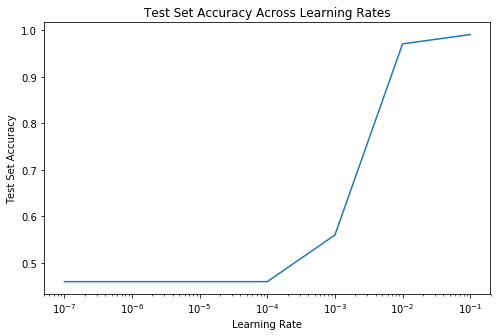

In [24]:
plt.figure(figsize=(8,5))
plt.plot(learning_rates, test_accs)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Test Set Accuracy')
plt.title('Test Set Accuracy Across Learning Rates')
plt.show()

## (4) Explore over-parameterization

*Explore the issue of testing error and over-parametrization.*

In the context of this problem, we'll define "testing error" as `1 - test_accuracy`.

Our results show that as we add many more nodes to the hidden layers and overparameterize our model, we overfit to the training data. This leads to increased testing error and decreased test set accuracy.

### (a) Generate data

Let's use the `make_classification` function from the scikit-learn datasets module again to generate the testing and training data.

In [32]:
# data generation
X_2_4, y_2_4 = make_classification(n_samples=n_samples, random_state=100)

### (b) Explore number of nodes vs. testing error

In order to experiment with a varying number of nodes, we'll incrementally add 10 nodes to each layer (except for the immediate input and output). We see that as we add more layers and increasingly overparameterize our model, the network overfits on the training data and makes more errors as it loses the ability to extrapolate to the testing data.

In [35]:
# layer architecture
architecture_4 = [
    {"input_dim": 20, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"}
]

In [36]:
test_errs = []
# iterate 5 times
for i in range(5):
    # each iteration, add 10 nodes to each layer
    # except first input and last output
    itr = 0
    if i > 0:
        for layer in architecture_4:
            if itr == 0:
                layer['output_dim'] = layer['output_dim'] + 10
            elif itr == 4:
                layer['input_dim'] = layer['input_dim'] + 10
            else:
                layer['input_dim'] = layer['input_dim'] + 10
                layer['output_dim'] = layer['output_dim'] + 10
            itr += 1
    # build network
    net_2_4 = MultiLayerNet(architecture_4)
    test_accuracy = net_2_4(X_2_4, y_2_4, test_size, verbose=False)
    test_error = 1 - test_accuracy
    test_errs.append(test_error)

Test set accuracy: 0.93
Test set accuracy: 0.90
Test set accuracy: 0.91
Test set accuracy: 0.90
Test set accuracy: 0.91


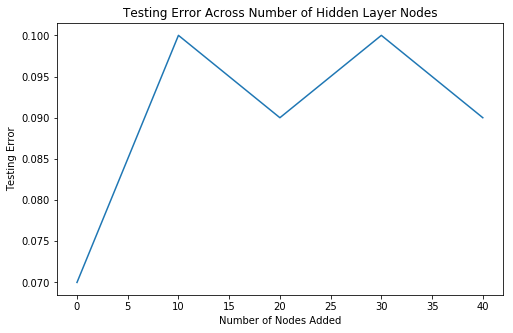

In [38]:
nodes_added = [i*10 for i in range(5)]

plt.figure(figsize=(8,5))
plt.plot(nodes_added, test_errs)
plt.xlabel('Number of Nodes Added')
plt.ylabel('Testing Error')
plt.title('Testing Error Across Number of Hidden Layer Nodes')
plt.show()

## Brief memo

*Write a brief memo on your work so that after one year, you can still recall what this assignment is about. Describe the underlying theory, method, code, and what you have done and discovered.*

This second problem was a sensible next step after the first problem. Working through the code and adjusting different parameters helped me understand the nuances of each layer of a neural network, especially the interdependence between the number of hidden layer nodes and the testing error. The best net built in this problem was the net that kept the original number of hidden layer nodes, had a learning rate of 1, and used the original dataset generated with `make_moons`.